In [8]:
using PyPlot;
using LinearAlgebra, Statistics, HDF5, Images

train_data = read(h5open("D:\\Download\\train_catvnoncat.h5"))
test_data = read(h5open("D:\\Download\\test_catvnoncat.h5"))

train_X = Int.(train_data["train_set_x"]) ./ 255
train_Y = train_data["train_set_y"]
test_X = Int.(test_data["test_set_x"]) ./ 255
test_Y = test_data["test_set_y"]
;

In [9]:
function random_init(n_x, n_h, n_y)
    W1 = randn(n_h, n_x) .* 0.01
    b1 = zeros(n_h)
    W2 = randn(n_y, n_h) .* 0.01
    b2 = zeros(n_y)
    W1, b1, W2, b2
end

function forward(parameters, X)
    W1, b1, W2, b2 = parameters
    Z1 = W1 * X .+ b1
    A1 = tanh.(Z1)
    Z2 = W2 * A1 .+ b2
    A2 = 1 ./ (1 .+ exp.(-Z2))
    Z1, A1, Z2, A2
end

function backward(parameters, cache, X, Y)
    W1, b1, W2, b2 = parameters
    Z1, A1, Z2, A2 = cache
    m = size(X)[2]
    cost = -mean(Y .* log.(A2) + (1 .- Y) .* log.(1 .- A2))
    dZ2 = A2 - Y
    dW2 = dZ2 * A1' ./ m
    db2 = mean(dZ2, dims = 2)
    dZ1 = W2' * dZ2 .* (1 .- A1 .^ 2)
    dW1 = dZ1 * X' / m
    db1 = mean(dZ1, dims = 2)
    [dW1, db1, dW2, db2], cost
end

function update_parameters(parameters, grads, learning_rate)
    W1, b1, W2, b2 = parameters
    dW1, db1, dW2, db2 = grads
    W1 -= learning_rate .* dW1
    b1 -= learning_rate .* db1
    W2 -= learning_rate .* dW2
    b2 -= learning_rate .* db2
    W1, b1, W2, b2
end

function predict(parameters, X)
    Z1, A1, Z2, A2 = forward(parameters, X)
    ifelse.(A2 .<= 0.5, 0, 1)
end

function model(X, Y; num_iterations = 2000, learning_rate = 0.009)
    n_x = size(X)[1]
    n_y = size(Y)[1]
    n_h = round(Int, sqrt(n_x * n_y))
    parameters = random_init(n_x, n_h, n_y)
    
    for i in 1:num_iterations
        cache = forward(parameters, X)
        grads, cost = backward(parameters, cache, X, Y)
        if i % 100 == 0
            println("Cost after $(i) iterations: $(round(cost, digits = 3))")
        end
        parameters = update_parameters(parameters, grads, learning_rate)
    end
    parameters
end

function main(train_X, train_Y, test_X, test_Y; num_iterations = 2000, learning_rate = 0.009)
    train_X = reshape(train_X, :, size(train_X)[length(size(train_X))])
    train_Y = reshape(train_Y, :, size(train_Y)[length(size(train_Y))])
    test_X = reshape(test_X, :, size(test_X)[length(size(test_X))])
    test_Y = reshape(test_Y, :, size(test_Y)[length(size(test_Y))])
    parameters = model(train_X, train_Y, num_iterations = num_iterations, learning_rate = learning_rate)
    train_Y_pred = predict(parameters, train_X)
    test_Y_pred = predict(parameters, test_X)
    println("train accuracy: $(round(mean(train_Y_pred .== train_Y) * 100, digits = 2))%")
    println("test accuracy: $(round(mean(test_Y_pred .== test_Y) * 100, digits = 2))%")
    parameters
end
;

In [10]:
parameters = main(train_X, train_Y, test_X, test_Y);

Cost after 100 iterations: 0.634
Cost after 200 iterations: 0.596
Cost after 300 iterations: 0.535
Cost after 400 iterations: 0.463
Cost after 500 iterations: 0.387
Cost after 600 iterations: 0.315
Cost after 700 iterations: 0.363
Cost after 800 iterations: 0.315
Cost after 900 iterations: 0.272
Cost after 1000 iterations: 0.23
Cost after 1100 iterations: 0.188
Cost after 1200 iterations: 0.144
Cost after 1300 iterations: 0.099
Cost after 1400 iterations: 0.076
Cost after 1500 iterations: 0.064
Cost after 1600 iterations: 0.055
Cost after 1700 iterations: 0.047
Cost after 1800 iterations: 0.042
Cost after 1900 iterations: 0.037
Cost after 2000 iterations: 0.033
train accuracy: 100.0%
test accuracy: 72.0%


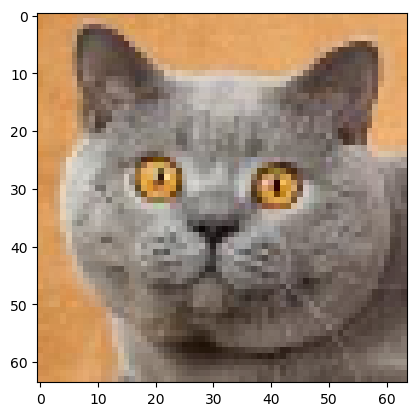

Prediction: Cat
Prediction: Non-cat


In [20]:
newimg = load("D:\\Download\\cat.jfif")
newimg = channelview(newimg)
newimg = imresize(newimg, 3, 64, 64)
imshow(permutedims(newimg, [2, 3, 1]))
X = reshape(newimg, :, 1)
for i in predict(parameters, X)
    if i == 1
        println("Prediction: Cat")
    else
        println("Prediction: Non-cat")
    end
end

newimg = load("D:\\Download\\dog.jfif")
newimg = channelview(newimg)
newimg = imresize(newimg, 3, 64, 64)
#imshow(permutedims(newimg, [2, 3, 1]))
X = reshape(newimg, :, 1)
for i in predict(parameters, X)
    if i == 1
        println("Prediction: Cat")
    else
        println("Prediction: Non-cat")
    end
end